## Convert `HDDM` model object to `ArviZ`

Author: Hu Chuan-Peng (PhD)

Contact: hcp4715 AT hotmail.com

We will use the example from [official tutorial of HDDM](http://ski.clps.brown.edu/hddm_docs/tutorial_python.html), and tried to convert the `HDDM` object to `Arviz` `InferenceData`.

So far, I haven't finished the `prior` part and the `log likelihood` part.

Note: to conver the posterior predictive needs substantial amount of memory, make sure that your machine's RAM is large enough.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import hddm
import kabuki
print("The current HDDM version is: ", hddm.__version__)

# parallel processing related packages
from p_tqdm import p_map
from functools import partial

The current HDDM version is:  0.8.0


## Loading data

In [3]:
# find the directory of "cavanagh_theta_nn.csv"
print(hddm.__file__)

/opt/conda/lib/python3.8/site-packages/hddm/__init__.py


In [4]:
!head /opt/conda/lib/python3.8/site-packages/hddm/examples/cavanagh_theta_nn.csv

subj_idx,stim,rt,response,theta,dbs,conf
0,LL,1.21,1.0,0.65627512226100004,1,HC
0,WL,1.6299999999999999,1.0,-0.32788867166199998,1,LC
0,WW,1.03,1.0,-0.480284512399,1,HC
0,WL,2.77,1.0,1.9274273452399999,1,LC
0,WW,1.1399999999999999,0.0,-0.21323572605999999,1,HC
0,WL,1.1499999999999999,1.0,-0.43620365940099998,1,LC
0,LL,2.0,1.0,-0.27447891439400002,1,HC
0,WL,1.04,0.0,0.66695707371400004,1,LC
0,WW,0.85699999999999998,1.0,0.11861689909799999,1,HC


In [5]:
data = hddm.load_csv('/opt/conda/lib/python3.8/site-packages/hddm/examples/cavanagh_theta_nn.csv')
data.head()

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.21,1.0,0.656275,1,HC
1,0,WL,1.63,1.0,-0.327889,1,LC
2,0,WW,1.03,1.0,-0.480285,1,HC
3,0,WL,2.77,1.0,1.927427,1,LC
4,0,WW,1.14,0.0,-0.213236,1,HC


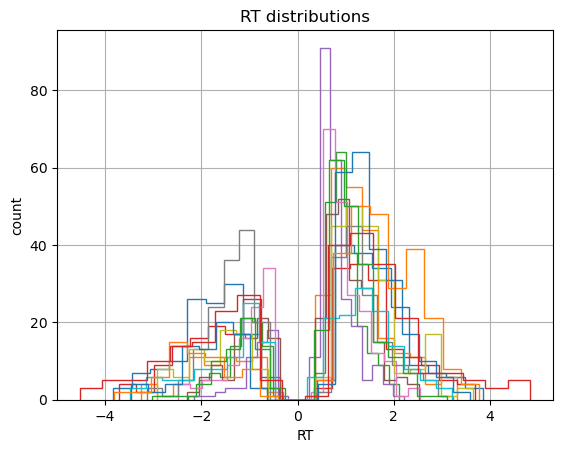

In [6]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# plt.savefig('hddm_demo_fig_00.pdf')

Check number of trials of each condition for each participant.

## Fitting a hierarchical model with four chains

#### Depends on stimulus

The original tutorial used code like this:

```
m_stim = hddm.HDDM(data, depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(2000, burn=500)
```

In [7]:
samples = 500 # number of samples for MCMC chain, 500 is used for quick demo 
burn = 200    # number of burn in    
thin = 1
chains = 4

In [8]:
# define a model
def model(id, data=None, samples=None, burn=None, save_name="cavanagh2011_m"): 
    print('running model%i'%id);
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    
    m = hddm.HDDM(data, depends_on={'v': 'stim'})
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # save the model data
    m.save(mname)
    
    return m

In [9]:
models = p_map(partial(model, data=data, samples=samples, burn=burn),
               range(chains)) # progess bar is a mess ;(

running model0
running model1
running model2

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:148: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for uniq_elem, grouped_data in grouped:


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:148: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for uniq_elem, grouped_data in grouped:
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a futur

  0%|          | 0/4 [00:00<?, ?it/s]

running model3

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:148: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for uniq_elem, grouped_data in grouped:
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a futur

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:148: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for uniq_elem, grouped_data in grouped:
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a futur

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

 ---------------  41%                  ] 208 of 500 complete in 11.6 sec[                  2%                  ] 11 of 500 complete in 0.5 sec[                  2%                  ] 11 of 500 complete in 0.5 sec [                  2%                  ] 11 of 500 complete in 0.5 sec  [-                 4%                  ] 21 of 500 complete in 1.1 sec[-                 4%                  ] 21 of 500 complete in 1.1 sec  [-                 4%                  ] 21 of 500 complete in 1.1 sec[-                 4%                  ] 21 of 500 complete in 1.1 sec  [--                6%                  ] 31 of 500 complete in 1.6 sec[--                6%                  ] 31 of 500 complete in 1.6 sec[---               8%                  ] 40 of 500 complete in 2.1 sec[---               8%                  ] 40 of 500 complete in 2.1 sec[---               8%                  ] 40 of 500 complete in 2.2 sec[---               8%                  ] 41 of 500 complete in 2.2 sec[---       

 [-----------------54%                  ] 272 of 500 complete in 16.1 sec[-----------------54%                  ] 274 of 500 complete in 16.4 sec[-----------------53%                  ] 269 of 500 complete in 16.5 sec[-----------------54%                  ] 271 of 500 complete in 16.5 sec[-----------------56%-                 ] 280 of 500 complete in 16.6 sec[-----------------56%-                 ] 281 of 500 complete in 16.9 sec[-----------------55%                  ] 276 of 500 complete in 17.0 sec[-----------------55%-                 ] 278 of 500 complete in 17.1 sec[-----------------57%-                 ] 288 of 500 complete in 17.1 sec[-----------------57%-                 ] 288 of 500 complete in 17.4 sec[-----------------56%-                 ] 284 of 500 complete in 17.6 sec[-----------------57%-                 ] 286 of 500 complete in 17.6 sec[-----------------59%--                ] 297 of 500 complete in 17.6 sec[-----------------59%--                ] 297 of 500 complete in

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:148: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for uniq_elem, grouped_data in grouped:
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a futur

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

 [-----------------96%----------------  ] 482 of 500 complete in 29.6 sec

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

 [-----------------95%----------------  ] 478 of 500 complete in 29.8 sec[-----------------96%----------------  ] 481 of 500 complete in 29.8 sec

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

 [-----------------98%----------------- ] 491 of 500 complete in 30.1 sec[-----------------97%----------------- ] 489 of 500 complete in 30.3 sec[-----------------98%----------------- ] 492 of 500 complete in 30.3 sec[-----------------100%-----------------] 500 of 500 complete in 30.6 sec[-----------------100%-----------------] 500 of 500 complete in 30.7 sec[-----------------100%-----------------] 501 of 500 complete in 30.8 sec

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:148: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for uniq_elem, grouped_data in grouped:
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a futur

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.nodes_db = pd.concat([self.nodes_db, row])
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:134: FutureWarning: In a future version, object-dtype columns with a

In [10]:
# Uncomment the code below if you already stored the model objects:
# m_stim_list = []
# exp_name = 'cavanagh2011'
# model_tag = 'm'
# for i in range(4):
#     mname  = '/home/jovyan/example/df_' + exp_name + '_' + model_tag + '_chain_%i'%i 
#     print(mname)
#     m = hddm.load(mname)
#     m_stim_list.append(m)

#### prepare the posterior predictive

Need to be parallalized in the future.

* Note 1: the number of sample is consistent with posterior
* Note 2: this part eats a lot of memory, keep the number of sample small at beginning.

In [10]:
df_stim_post_preds = []
for i in range(4):
    m = models[i]
    df_post_pred = hddm.utils.post_pred_gen(m, samples = 1000) # number of samples can be reduced (?)
    df_post_pred.reset_index(inplace=True)
    df_post_pred['chain'] = i
    df_post_pred.rename(columns={'sample':'draw',
                                 'level_2':'trial'}, inplace=True)
    print('\nchain', i, df_post_pred.shape)
    df_stim_post_preds.append(df_post_pred)

# delete interim variables to save memory
del m
del df_post_pred

TypeError: random() got an unexpected keyword argument 'add_model_parameters'

## Convert HDDM objects to ArviZ

Let's try to compare `m_stim_list` and `m_reg_list` in the above models.

To convert a `HDDM` object to an `ArviZ` InferenceData and use all the functionality of `ArviZ`, we need to convert the following parts (see more details about Ariviz InferenceData [here](https://arviz-devs.github.io/arviz/schema/schema.html#posterior-predictive)):

* observed_data: the data on which the posterior is conditional. Each variable should have a counter part.

* Posterior: Samples from the posterior distribution $p(\theta | y)$, which is the trace from pymc.

* posterior_predictive: the posterior predictive distribution evaluated at the `observed_data`. Samples should match with `posterior` ones and its variables should match `observed_data` variables. The `observed_data` counterpart variable may have a different name.

* **sample_stats**: Information and diagnostics for each `posterior` sample, provided by the inference backend.

* **log_likelihood**: pointwise log likelihood data. Sample shoudl match with `posteior` ones and its variables should match `observed_data` variables.

* **prior**: Samples from the prior distriubtion $p(\theta)$. Samples need not to match `posterior`. still follow the convertion on `chain` and `draw` as first dimensions.

* **prior_predictive**: Samples from the `prior` predictive distribution. Samples should match `prior` samples and each variable should have a counterpart in `posterior_predictive/observed_data`.


So far, I converted the observed data, posterior, and posterior predictive. We can use the plot function from ArviZ.

For model evaluation functions of `ArviZ`, which need `log likelihood`, has been converted yet. That said, `az.loo()` and `az.waic()` is not supported yet.

In [11]:
import arviz as az
import numpy as np
import pandas as pd
import xarray as xr

In [12]:
print("DIC of m_depends_on is %.5f" % models[0].dic)

DIC of m_depends_on is 10784.43437


### `observed_data`

In this example data, we have 14 participants, each with three different conditions, each condition has different trial numbers.

In [13]:
data.groupby(['subj_idx', 'stim']).size()

subj_idx  stim
0         LL       73
          WL      151
          WW       74
1         LL       74
          WL      153
          WW       71
2         LL       73
          WL      147
          WW       73
3         LL       62
          WL      129
          WW       64
4         LL       70
          WL      144
          WW       69
5         LL       77
          WL      155
          WW       71
6         LL       73
          WL      154
          WW       72
7         LL       77
          WL      142
          WW       75
8         LL       74
          WL      148
          WW       71
9         LL       53
          WL      110
          WW       54
10        LL       76
          WL      157
          WW       76
11        LL       73
          WL      153
          WW       79
12        LL       61
          WL      138
          WW       68
13        LL       68
          WL      135
          WW       71
dtype: int64

Here I created an temporary data to store the observed data and then converted it to `xarrage` data.

In [14]:
data_tmp = data.copy()
data_tmp['trial'] = data_tmp.groupby(['subj_idx', 'stim']).cumcount()
data_tmp.drop(['theta','dbs','conf'], axis=1, inplace=True)
data_tmp.head()

,subj_idx,stim,rt,response,trial
0,0,LL,1.21,1.0,0
1,0,WL,1.63,1.0,0
2,0,WW,1.03,1.0,0
3,0,WL,2.77,1.0,1
4,0,WW,-1.14,0.0,1


In [15]:
data_tmp = data_tmp.set_index(["subj_idx", "stim", 'trial'])
xdata_observed = xr.Dataset.from_dataframe(data_tmp)
xdata_observed

<xarray.Dataset>
Dimensions:   (subj_idx: 14, stim: 3, trial: 157)
Coordinates:
  * subj_idx  (subj_idx) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * stim      (stim) object 'LL' 'WL' 'WW'
  * trial     (trial) int64 0 1 2 3 4 5 6 7 ... 149 150 151 152 153 154 155 156
Data variables:
    rt        (subj_idx, stim, trial) float64 1.21 2.0 1.72 1.72 ... nan nan nan
    response  (subj_idx, stim, trial) float64 1.0 1.0 1.0 1.0 ... nan nan nan

### `posterior`
The `posterior` are from the traces

In [16]:
df_stim_traces = []
for i in range(4):
    m = models[i]
    df_trace = m.get_traces()
    df_trace['chain'] = i
    df_trace['draw'] = np.arange(len(df_trace), dtype=int)
    print('chain', i, df_trace.shape)
    df_stim_traces.append(df_trace)
df_stim_traces = pd.concat(df_stim_traces)
df_stim_traces = df_stim_traces.set_index(["chain", "draw"])

chain 0 (300, 80)
chain 1 (300, 80)
chain 2 (300, 80)
chain 3 (300, 80)


In [ ]:
xposterior_stim = xr.Dataset.from_dataframe(df_stim_traces)
xposterior_stim

### `posterior_predictive`


In [ ]:
df_stim_ppc = []
for i in range(4):
    df_post_pred = df_stim_post_preds[i]
    df_post_pred['chain'] = i
    # df_post_pred['draw'] = np.arange(len(df), dtype=int)
    # print('chain', i, df.shape)
    df_post_pred[['stim', 'subj_idx']] = df_post_pred['node'].str.split(pat='\.', expand=True)

    # extract the stim string between "(" and ")"

    df_post_pred['stim'] = df_post_pred['stim'].str.extract('.*\((.*)\).*')
    df_post_pred.drop('node', axis=1, inplace=True)
    df_stim_ppc.append(df_post_pred)

# df_stim_ppc = df_stim_traces.set_index(["chain", "draw"])

In [ ]:
del df_post_pred

In [ ]:
df_stim_ppc = pd.concat(df_stim_ppc)
df_stim_ppc.head()

In [ ]:
df_stim_ppc = df_stim_ppc.set_index(["chain", "draw",'subj_idx', 'stim', 'trial'])
xdata_post_pred = xr.Dataset.from_dataframe(df_stim_ppc) # also eat memory here
xdata_post_pred

In [ ]:
InfData_stim = az.InferenceData(posterior=xposterior_stim, observed_data=xdata_observed,
                                posterior_predictive=xdata_post_pred)

InfData_stim

In [ ]:
from arviz.utils import Numba
Numba.disable_numba() # Numba has comptability issue see: https://github.com/pymc-devs/pymc/issues/4570
Numba.numba_flag

az.plot_trace(InfData_stim)

In [ ]:
# plot traces
az.plot_trace(InfData_stim, var_names=("^a"), filter_vars='regex', rug=True, kind="rank_bars")

In [ ]:
az.plot_forest(InfData_stim)

In [ ]:
az.hdi(InfData_stim)

In [ ]:
# plot ppc
az.plot_ppc(InfData_stim)

### Tried to draw from prior (failed)

In [ ]:
tmp = m_stim_list[0]
draw_from_prior(tmp, update=False)
# tmp.draw_from_prior(update=False)

In [ ]:
df_stim_priors = []
for i in range(4):
    df = models[i]
    df_prior = df.draw_from_prior()
    df_prior['chain'] = i
    df_prior['draw'] = np.arange(len(df_prior), dtype=int)
    print('chain', i, df_prior.shape)
    df_priors.append(df_trace)
df_stim_priors = pd.concat(df_stim_priors)
df_stim_priors = df_stim_priors.set_index(["chain", "draw"])